Kami dari kelompok 2 yang beranggotakan:
1. Annisa Aprilia
2. Rika Anggraini
3. Rendhi Andrianto

## 1. INTRODUCE

Data Heart Failure Prediction merupakan data yang berisikan 13 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung. Gagal jantung adalah kejadian umum yang disebabkan oleh penyakit kardiovaskular. Penyakit kardiovaskular (CVD) merupakan penyebab kematian nomor 1 secara global , merenggut sekitar 17,9 juta jiwa setiap tahunnya , atau menyumbang 31% dari seluruh kematian di seluruh dunia. Faktor yang mempengaruhi penyakit jantung adalah pola makan yang tidak sehat, kurangnya aktivitas fisik, penggunaan tembakau, dan penggunaan alkohol yang berbahaya. Efek dari faktor risiko perilaku dapat muncul pada individu seperti peningkatan tekanan darah, peningkatan glukosa darah, peningkatan lipid darah, serta kelebihan berat badan dan obesitas. “Faktor risiko menengah” ini dapat diukur di fasilitas layanan kesehatan primer dan menunjukkan peningkatan risiko serangan jantung, stroke, gagal jantung, dan komplikasi lainnya. Dalam dataset ini memiliki 13 attribut yang bisa dirediksi upaya keselamatan pasien dari penyakit jantung atau pun mengetahui kemungkinan seseorang akan meninggalkan akibat adanya penyakit gagal jantung ini. 13 attribut tersebut yaitu :
1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi
di setiap kontraksi jantung
6. high_blood_pressure - apakah pasien punya darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
11. smoking - apakah pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up

Dan pada kasus ini  kami memprediksi kematian akibat Gagal Jantung dengan menggunakan model Random Forest dan Ensembel karena data memuat banyak kolom berisikan informasi mengenai gagal jantung  model Random Forest dapat menggabungkan beberapa model prediktif yang lebih sederhana untuk mencapai prediksi mengenai kemungkinan sesorang akan meninggal atau tidak yang lebih akurat dan stabil.

## 2. IMPORT PUSTAKA

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, f1_score, recall_score, precision_score, accuracy_score, confusion_matrix
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
import pickle
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics

## 3. DATA LOADING

In [2]:
# memasukkan data Prediksi Gagal Jantung 
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [3]:
# mengetahui jumlah baris dan kolom dari dataset
df.shape

(299, 13)

In [4]:
# mengetahui tipe data dari kolom yang ada pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
# mengetahui deskripsi (berisikan jumlah, mean, standar deviasi, min, max dan kuartil) tiap kolom dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [6]:
# Menampilkan deskripsi hanya pada kolom dengan tipe data Float
df.describe(include=float).T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4


Pada tahap loading data kita terlebih dahulu memanggil data, mencari tahu info dari data, dan mengetahui nilai statistik deskriptif dari data tersebut. Untuk syntax df.describe().T berfungsi mengubah/ mengtranspose baris menjadi kolom. 

## 4. DATA CLEANING

### 4.1 Mengetahui Data Unique

In [7]:
pd.DataFrame(df.nunique()).reset_index().rename(columns={'index':'nama kolom', 0 : 'nilai unik'})

,nama kolom,nilai unik
0,age,47
1,anaemia,2
2,creatinine_phosphokinase,208
3,diabetes,2
4,ejection_fraction,17
5,high_blood_pressure,2
6,platelets,176
7,serum_creatinine,40
8,serum_sodium,27
9,sex,2


In [8]:
# Mengganti nama kolom "Time" menjadi "Day"
df = df.rename(columns={'time': 'day'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  day                       299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


pada tahap ini kita dapat mengetahui nilai unique dari data Heart Failure Prediction. istilah unique" atau "unik" merujuk pada nilai-nilai yang bersifat unik atau tidak memiliki duplikat dalam suatu, atau dengan kata lain unique adalah mengindentifikasi dan penghapusan nilai-nilai yang sama atau duplikat dari suatu kolom atau datase. pada tahap ini juga kami mengubah kolom time menjadi day/hari karena kolom time berisikan waktu dalam hari sehingga lebih baik diganti day guna meminimalkan misinformasi

### 4.2 Menghapus Missing Value

In [9]:
# Melihat apakah ada missing value atau tidak
pd.DataFrame(df.isna().sum())

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


Karena tidak terdapat missing value maka tidak perlu ada data yang diubah nilai nya ataupun menghapus kolom nya.

### 4.3 Mencari Outlier

In [10]:
# Menghitung Q1, Q3, dan IQR
# Menghitung Q1, Q3, dan IQR
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
# Mengidentifikasi outlier
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df < lower_bound) | (df > upper_bound)]

# Menampilkan hasil
print("Kuartil Pertama (Q1):", q1)
print("\nKuartil Ketiga (Q3):", q3)
print("\nInterquartile Range (IQR):", iqr)



Kuartil Pertama (Q1): age                             51.0
anaemia                          0.0
creatinine_phosphokinase       116.5
diabetes                         0.0
ejection_fraction               30.0
high_blood_pressure              0.0
platelets                   212500.0
serum_creatinine                 0.9
serum_sodium                   134.0
sex                              0.0
smoking                          0.0
day                             73.0
DEATH_EVENT                      0.0
Name: 0.25, dtype: float64

Kuartil Ketiga (Q3): age                             70.0
anaemia                          1.0
creatinine_phosphokinase       582.0
diabetes                         1.0
ejection_fraction               45.0
high_blood_pressure              1.0
platelets                   303500.0
serum_creatinine                 1.4
serum_sodium                   140.0
sex                              1.0
smoking                          1.0
day                            203.0
DEAT

In [11]:
print("Outliers:")
print(outliers)

Outliers:
     age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    NaN      NaN                       NaN       NaN                NaN   
1    NaN      NaN                    7861.0       NaN                NaN   
2    NaN      NaN                       NaN       NaN                NaN   
3    NaN      NaN                       NaN       NaN                NaN   
4    NaN      NaN                       NaN       NaN                NaN   
..   ...      ...                       ...       ...                ...   
294  NaN      NaN                       NaN       NaN                NaN   
295  NaN      NaN                    1820.0       NaN                NaN   
296  NaN      NaN                    2060.0       NaN                NaN   
297  NaN      NaN                    2413.0       NaN                NaN   
298  NaN      NaN                       NaN       NaN                NaN   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0

## 5. EKSPLORASI DATA


### 5.1 measure of central tendency : mean, median

In [12]:
# untuk mengetahui mean dari data tersebut bisa menggunakan syntax .describe()

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [13]:
print('nilai medianya sebagai berikut :')
df.median()

nilai medianya sebagai berikut :


age                             60.0
anaemia                          0.0
creatinine_phosphokinase       250.0
diabetes                         0.0
ejection_fraction               38.0
high_blood_pressure              0.0
platelets                   262000.0
serum_creatinine                 1.1
serum_sodium                   137.0
sex                              1.0
smoking                          0.0
day                            115.0
DEATH_EVENT                      0.0
dtype: float64

### 5.2 Measure of central tendency : modus

In [14]:
df.mode().iloc[0]

age                             60.00
anaemia                          0.00
creatinine_phosphokinase       582.00
diabetes                         0.00
ejection_fraction               35.00
high_blood_pressure              0.00
platelets                   263358.03
serum_creatinine                 1.00
serum_sodium                   136.00
sex                              1.00
smoking                          0.00
day                            187.00
DEATH_EVENT                      0.00
Name: 0, dtype: float64

### 5.3 Measure of spread : Range

In [15]:
nilai_max = df.max()
nilai_max

age                             95.0
anaemia                          1.0
creatinine_phosphokinase      7861.0
diabetes                         1.0
ejection_fraction               80.0
high_blood_pressure              1.0
platelets                   850000.0
serum_creatinine                 9.4
serum_sodium                   148.0
sex                              1.0
smoking                          1.0
day                            285.0
DEATH_EVENT                      1.0
dtype: float64

In [16]:
nilai_min = df.min()
nilai_min

age                            40.0
anaemia                         0.0
creatinine_phosphokinase       23.0
diabetes                        0.0
ejection_fraction              14.0
high_blood_pressure             0.0
platelets                   25100.0
serum_creatinine                0.5
serum_sodium                  113.0
sex                             0.0
smoking                         0.0
day                             4.0
DEATH_EVENT                     0.0
dtype: float64

In [17]:
print('nilai rangenya yaitu :')
measure_range = nilai_max - nilai_min
measure_range

nilai rangenya yaitu :


age                             55.0
anaemia                          1.0
creatinine_phosphokinase      7838.0
diabetes                         1.0
ejection_fraction               66.0
high_blood_pressure              1.0
platelets                   824900.0
serum_creatinine                 8.9
serum_sodium                    35.0
sex                              1.0
smoking                          1.0
day                            281.0
DEATH_EVENT                      1.0
dtype: float64

### 5.4 Measure of spread : variance

In [18]:
df.var().reset_index().rename(
    columns={'index': 'column name', 0 : 'variance'})

,column name,variance
0,age,1.414865e+02
1,anaemia,2.461224e-01
2,creatinine_phosphokinase,9.414586e+05
3,diabetes,2.441023e-01
4,ejection_fraction,1.400635e+02
5,high_blood_pressure,2.286144e-01
6,platelets,9.565669e+09
7,serum_creatinine,1.070211e+00
8,serum_sodium,1.946996e+01
9,sex,2.286144e-01


### 5.6 Measure of spread : standard deviation

In [19]:
df.std().reset_index().rename(
    columns={'index': 'column name', 0 : 'Standard Deviation'})

,column name,Standard Deviation
0,age,11.894809
1,anaemia,0.496107
2,creatinine_phosphokinase,970.287881
3,diabetes,0.494067
4,ejection_fraction,11.834841
5,high_blood_pressure,0.478136
6,platelets,97804.236869
7,serum_creatinine,1.034510
8,serum_sodium,4.412477
9,sex,0.478136


## 5.7 Visualisasi Data

### 5.7.1 Histogram

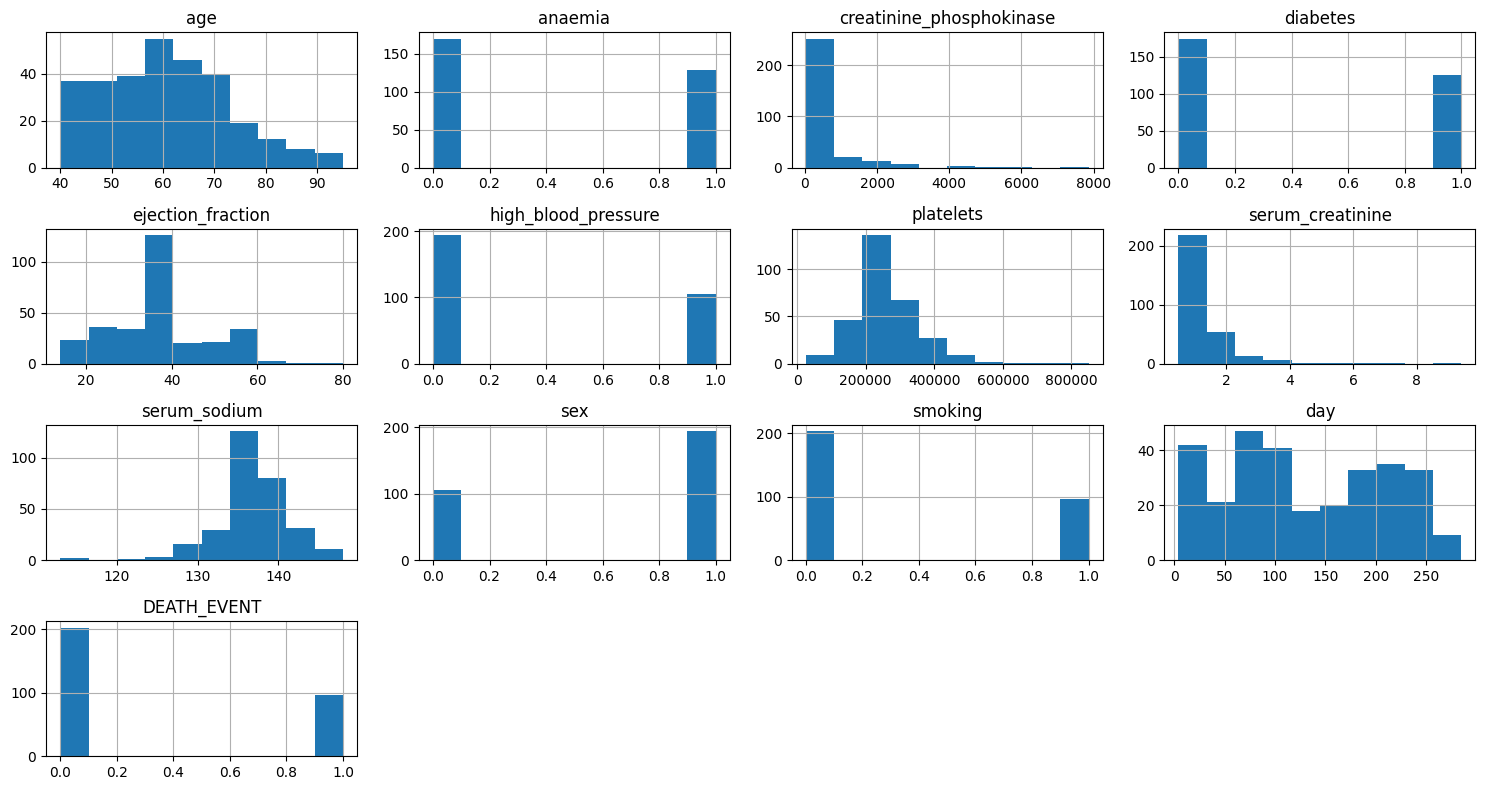

In [20]:
# menampilkan histogram dari dataset
df.hist(figsize=(15, 8))
plt.title('Histogram Numerical Columns')
plt.tight_layout()
plt.show()

berdasarkan visualisasi histogram di atas, dapat dilihat bahwasannya grafik histogram dari ejection faction berdistribusi ke kiri, kolom platelets berdistribusi ke kanan, kolom sorum sodium berdistribusi normal, kolom age berdistribusi ke kiri, kolom serum creathine berdistribusi ke kiri, kolom day berdistribusi ke kiri 

### 5.7.2 Bar Plot

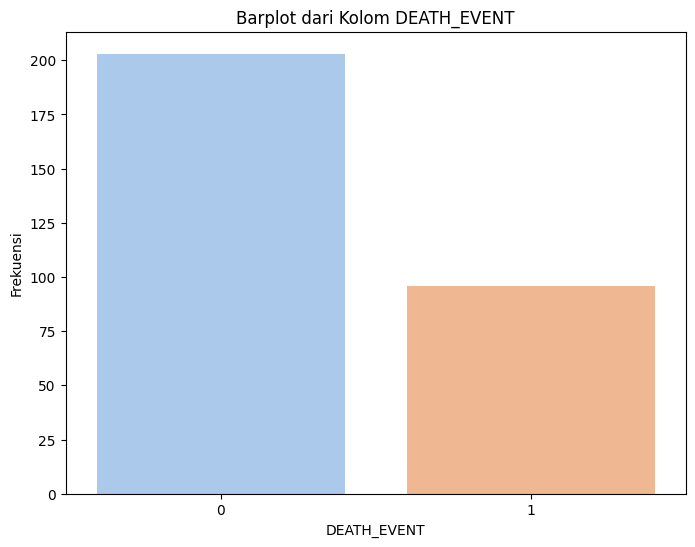

In [21]:
# Pilih kolom yang ingin divisualisasikan
kolom_visualisasi = 'DEATH_EVENT'

# Hitung frekuensi nilai unik dalam kolom tersebut
count_values = df[kolom_visualisasi].value_counts()

# Visualisasi menggunakan Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=count_values.index, y=count_values.values, palette='pastel')
plt.title(f'Barplot dari Kolom {kolom_visualisasi}')
plt.xlabel(kolom_visualisasi)
plt.ylabel('Frekuensi')
plt.show()

berdasarkan visualisasi barplot di atas dapat disimpulkan bahwa frekuensi kemungkinan seseorang akan meninggal akibat gagal jantung lebih kecil dibandingkan seseorang yang survive atau selamat dari gagal jantung.

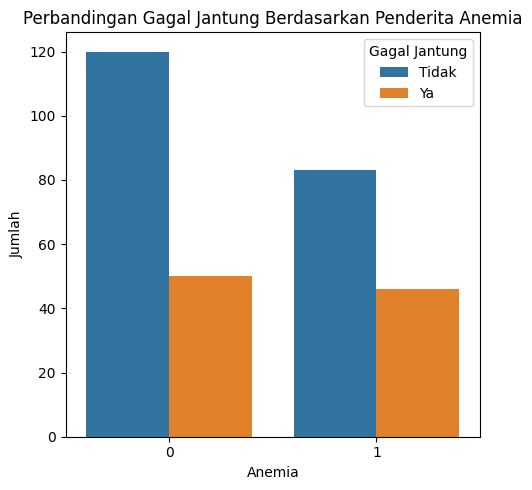

In [22]:
# Membuat barplot
plt.figure(figsize=(5, 5))
sns.countplot(x='anaemia', hue='DEATH_EVENT', data=df)

# Menambahkan label dan judul
plt.xlabel('Anemia')
plt.ylabel('Jumlah')
plt.title('Perbandingan Gagal Jantung Berdasarkan Penderita Anemia')

# Menampilkan legenda
plt.legend(title='Gagal Jantung', labels=['Tidak', 'Ya'])

# Menyesuaikan layout
plt.tight_layout()

# Menampilkan plot
plt.show()

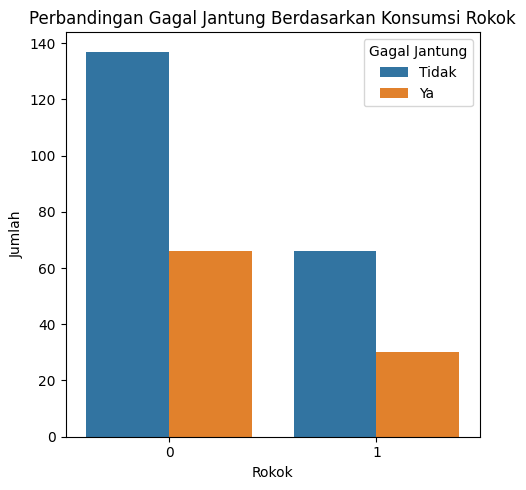

In [23]:
# Membuat barplot
plt.figure(figsize=(5, 5))
sns.countplot(x='smoking', hue='DEATH_EVENT', data=df)

# Menambahkan label dan judul
plt.xlabel('Rokok')
plt.ylabel('Jumlah')
plt.title('Perbandingan Gagal Jantung Berdasarkan Konsumsi Rokok')

# Menampilkan legenda
plt.legend(title='Gagal Jantung', labels=['Tidak', 'Ya'])

# Menyesuaikan layout
plt.tight_layout()

# Menampilkan plot
plt.show()

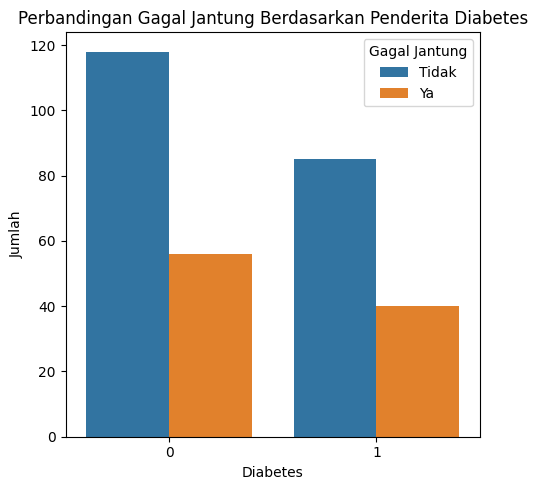

In [24]:
# Membuat barplot
plt.figure(figsize=(5, 5))
sns.countplot(x='diabetes', hue='DEATH_EVENT', data=df)

# Menambahkan label dan judul
plt.xlabel('Diabetes')
plt.ylabel('Jumlah')
plt.title('Perbandingan Gagal Jantung Berdasarkan Penderita Diabetes')

# Menampilkan legenda
plt.legend(title='Gagal Jantung', labels=['Tidak', 'Ya'])

# Menyesuaikan layout
plt.tight_layout()

# Menampilkan plot
plt.show()

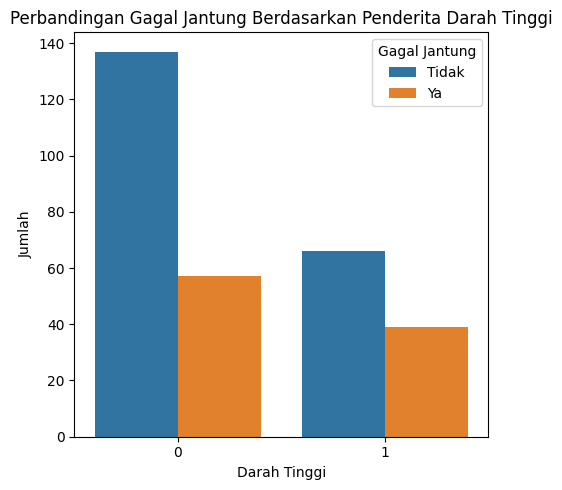

In [25]:
# Membuat barplot
plt.figure(figsize=(5, 5))
sns.countplot(x='high_blood_pressure', hue='DEATH_EVENT', data=df)

# Menambahkan label dan judul
plt.xlabel('Darah Tinggi')
plt.ylabel('Jumlah')
plt.title('Perbandingan Gagal Jantung Berdasarkan Penderita Darah Tinggi')

# Menampilkan legenda
plt.legend(title='Gagal Jantung', labels=['Tidak', 'Ya'])

# Menyesuaikan layout
plt.tight_layout()

# Menampilkan plot
plt.show()

Dari kolom pemicu gagal jantung (anemia, rokok, diabetes, hipertensi). berikut adalah kesimpulan dari analisis bar plot:
1. pada kolom anemia, dapat disimpulkan bahwa penderita anemia yang terkena gagal jantung ada sekitar +/- 80 pasien. dan yang tidak terkena gagal jantung sekitar +/- 80 pasien.
2. pada kolom rokok, dapat disimpulkan bahwa pasien yang mengonsumsi rokok yang terkena gagal jantung ada sekitar +/- 30 pasien. dan yang tidak terkena gagal jantung sekitar +/- 70 pasien.
3. pada kolom rokok, dapat disimpulkan bahwa pasien penderita diabetes yang terkena gagal jantung ada sekitar +/- 40 pasien. dan yang tidak terkena gagal jantung sekitar +/- 80 pasien.
4. pada kolom hipertensi atau darah tinggi, dapat disimpulkan bahwa pasien yang memiliki hipertensi yang terkena gagal jantung ada sekitar +/- 40 pasien. dan yang tidak terkena gagal jantung sekitar +/- 65 pasien.

### 5.7.3 Correlation Matrix

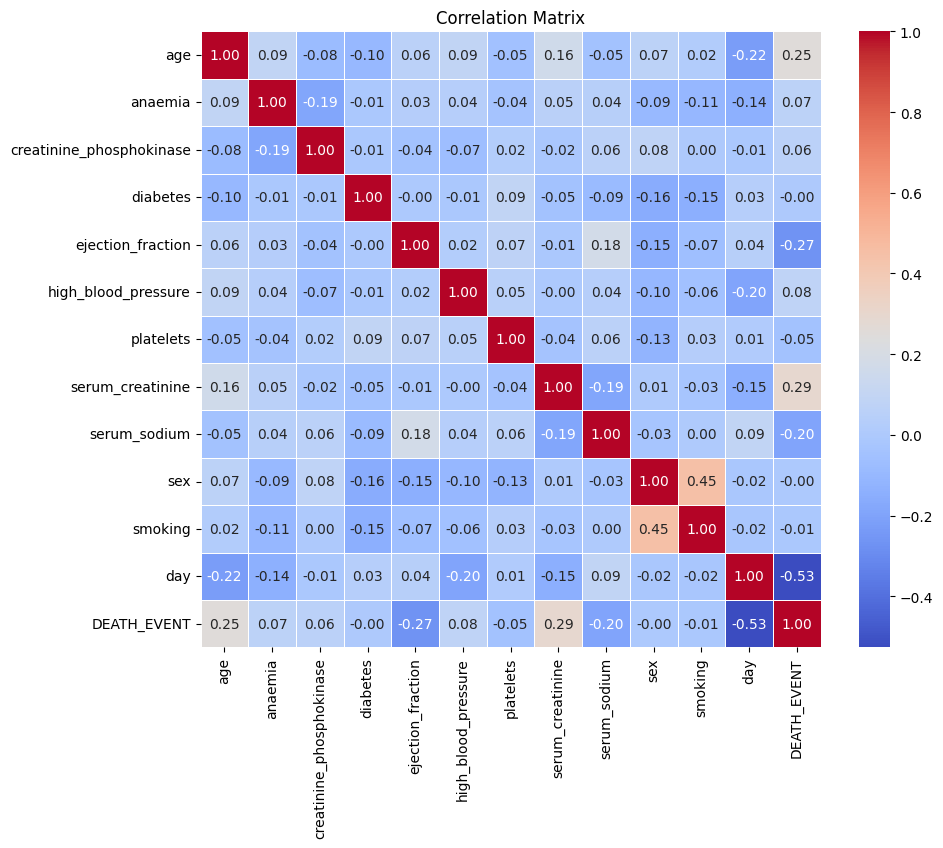

In [26]:
# Membuat plot matriks korelasi menggunakan heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Dari visualisasi correlation matrix (matriks korelasi) dapat dilihat bahwa banyak hubungan yang negatif antar kolom (nilai antara -1 hingga 0). Sehingga, ketika nilai satu variabel meningkat, kemungkinan besar nilai variabel lainnya akan menurun, dan sebaliknya.

### 5.7.4 Scatter Plot

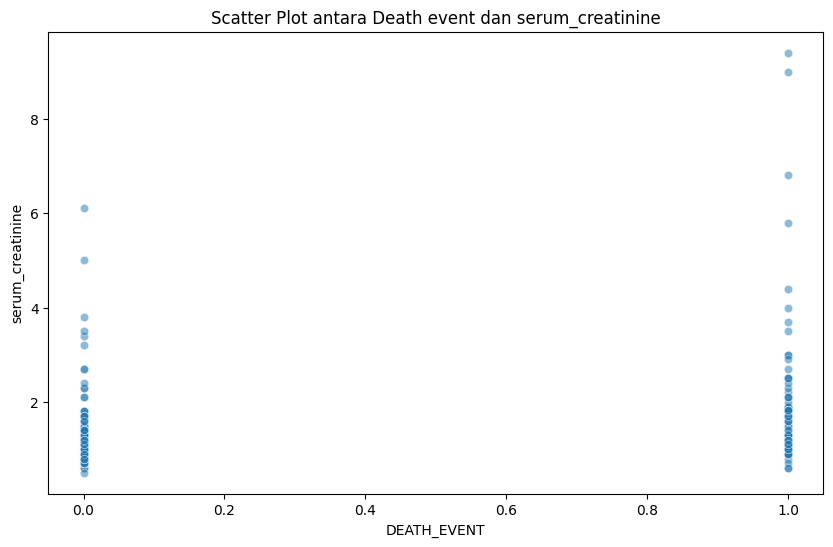


Korelasi antara DEATH_EVENT dan serum_creatinine: 0.2942775609841493


In [27]:

# Visualisasi scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DEATH_EVENT', y='serum_creatinine', data=df, alpha=0.5)
plt.title('Scatter Plot antara Death event dan serum_creatinine')
plt.xlabel('DEATH_EVENT')
plt.ylabel('serum_creatinine')
plt.show()

# Hitung korelasi
korelasi = df['DEATH_EVENT'].corr(df['serum_creatinine'])
print(f"\nKorelasi antara DEATH_EVENT dan serum_creatinine: {korelasi}")

korelasi antara serum_creatinine dengan DEATH_EVENT memiliki nilai yang cenderung kecil. Dapat disimpulkan bahwa kedua kolom tersebut memiliki hubungan positif yang kecil.

### 5.7.5 Visualisasi Bar Plot dengan Groupby

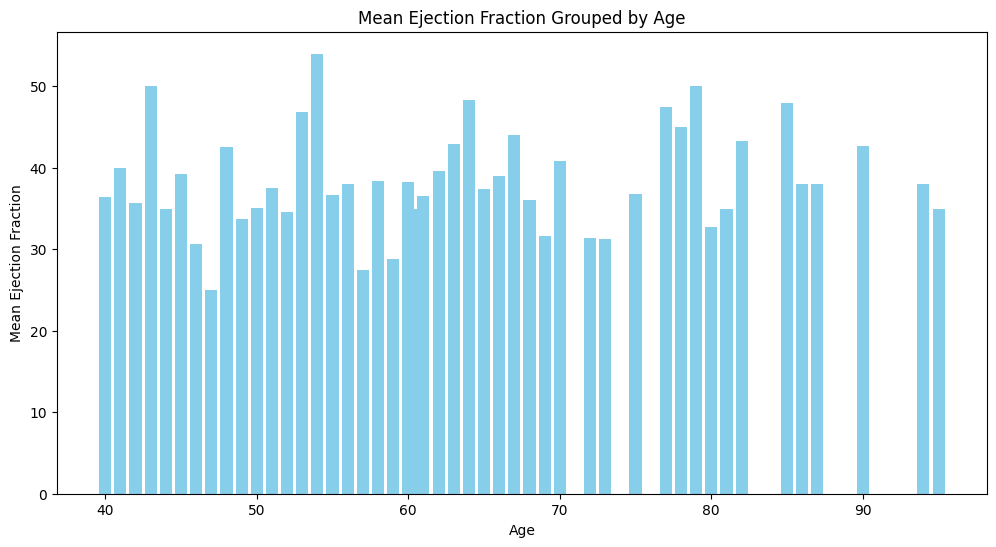

In [28]:

# Mengelompokkan data berdasarkan kolom 'age' dan menghitung mean ejection fraction
grouped_data = df.groupby('age')['ejection_fraction'].mean().reset_index()

# Membuat plot
plt.figure(figsize=(12, 6))
plt.bar(grouped_data['age'], grouped_data['ejection_fraction'], color='skyblue')
plt.title('Mean Ejection Fraction Grouped by Age')
plt.xlabel('Age')
plt.ylabel('Mean Ejection Fraction')
plt.show()

Dari visualisasi data tersebut, dapat disimpulkan bahwa umur yang memiliki rata-rata tingkat Ejection Fraction yang tinggi berada di kisaran 40-55 tahun.

## 6. DATA PREPROCESSING

### 6.1 Inisialisasi Data

In [29]:
# Melakukan inisialisasi RobustScaler
scaler = RobustScaler()

# Memasangkan scaler pada data dan mengubah datanya
scaled_data = scaler.fit_transform(df)

# Mengonversi data yang sudah di skala kembali ke DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

In [30]:
scaled_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,day,DEATH_EVENT
0,0.789474,0.0,0.713212,0.0,-1.2,1.0,0.032967,1.6,-1.166667,0.0,0.0,-0.853846,1.0
1,-0.263158,0.0,16.350161,0.0,0.0,0.0,0.014923,0.0,-0.166667,0.0,0.0,-0.838462,1.0
2,0.263158,0.0,-0.223416,0.0,-1.2,0.0,-1.098901,0.4,-1.333333,0.0,1.0,-0.830769,1.0
3,-0.526316,1.0,-0.298604,0.0,-1.2,0.0,-0.571429,1.6,0.000000,0.0,0.0,-0.830769,1.0
4,0.263158,1.0,-0.193340,1.0,-1.2,0.0,0.714286,3.2,-3.500000,-1.0,0.0,-0.823077,1.0


pada syntax  fit_transform digunakan untuk memasangkan (fit) RobustScaler pada data (df) dan melakukan transformasi penskalaan. Data yang telah diubah akan disimpan dalam variabel scaled_data. Proses ini menghitung median dan kuartil dari data untuk setiap fitur, dan kemudian menggunakan informasi tersebut untuk mentransformasi data. Untuk (scaled_data) berguna untuk kembali ke dalam DataFrame dengan menggunakan nama kolom yang sama seperti DataFrame awal (df). Ini memungkinkan untuk memahami data yang telah diubah dalam konteks kolom yang sesuai.

### 6.2 Persiapan data untuk pelatihan model dengan train_test_split()

In [31]:
X = scaled_df.drop('DEATH_EVENT', axis=1)
y = scaled_df['DEATH_EVENT']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 7. PENDEFINISIAN, PELATIHAN, DAN EVALUASI MODEL

### 7.1 Pendefinisian dan pelatihan model

In [33]:
# Mendefinisikan model Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model pada data latih
random_forest_model.fit(X_train, y_train)

# Membuat prediksi pada data uji
y_pred = random_forest_model.predict(X_test)

# Mengukur performa model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Menampilkan hasil performa model
print(f"Accuracy: {accuracy}")
print(f"\nConfusion Matrix:\n{conf_matrix}")
print(f"\nClassification Report:\n{classification_rep}")

Accuracy: 0.75

Confusion Matrix:
[[33  2]
 [13 12]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.72      0.94      0.81        35
         1.0       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60



kami menggunakan model Random Forest dan Ensembel karena data memuat banyak kolom berisikan informasi mengenai gagal jantung. model Random Forest dapat menggabungkan beberapa pohon keputusan yang independen, ia memiliki kemampuan yang lebih baik untuk menangani noise dan variasi dalam data, sehingga menghasilkan prediksi yang lebih konsisten dan andal untuk mencapai prediksi mengenai kemungkinan sesorang akan meninggal atau tidak yang lebih akurat dan stabil. 
berdasarkan output dari model pelatihan random forest dapat disimpulkan :
1. Akurasi model adalah 0.75, yang berarti model mampu memprediksi kelas dengan benar sebesar 75%. Akurasi memberikan gambaran umum tentang kinerja model, namun, perlu juga mempertimbangkan metrik lainnya.
2. Precision (presisi) untuk kelas 0.0 adalah 0.72, dan recall (sensitivitas) adalah 0.94. Untuk kelas 1.0, precision adalah 0.86, dan recall adalah 0.48. F1-score untuk kelas 0.0 adalah 0.81, dan untuk kelas 1.0 adalah 0.62. Support adalah jumlah instance dalam setiap kelas.
3. Model memiliki performa yang baik dalam mengidentifikasi kelas 0.0 (recall 0.94), tetapi kurang efektif dalam mengidentifikasi kelas 1.0 (recall 0.48). Oleh karena itu, terdapat ketidakseimbangan antara precision dan recall, yang dapat menjadi area perbaikan.
4. Meskipun akurasi keseluruhan adalah 0.75, evaluasi lebih lanjut terhadap confusion matrix dan laporan klasifikasi dapat memberikan wawasan lebih lanjut tentang kinerja model dan area yang perlu diperbaiki.


Fokus pada peningkatan recall untuk kelas 1.0 dapat meningkatkan kinerja model dalam mengidentifikasi kasus positif. Beberapa teknik yang dapat digunakan termasuk penalaan ulang kelas, penyesuaian threshold, atau menggunakan teknik sampling untuk menangani ketidakseimbangan kelas.

Dari kesimpulan ini, kami menemukan bahwa terdapat ketidakseimbangan data sehingga bisa saja menggunakan SMOTE() untuk mengatasi ketidakseimbangan pada data. Namun kami memilih untuk tidak menggunakan SMOTE() karena ingin meminimalisir terjadinya overfitting.

### 7.2 Evaluasi Model

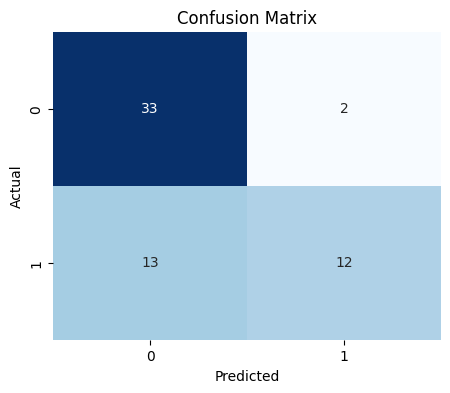

In [34]:
# Penggunaan confusion matrix untuk evaluasi model

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix dengan seaborn dan matplotlib
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Pada confusion matrix diatas dapat disimpulkan bahwa:
1. Nilai TP (True Positive) adalah 12
2. Nilai TN (True Negative) adalah 33
3. Nilai FP (False Positive) adalah 2
4. Nilai FN (False Negative) adalah 13

## 8. MODEL INFERENCE

In [35]:
model_inference = {
    'age': [52,44,20,21],
    'anaemia': [1,0,1,0],
    'creatinine_phosphokinase': [120,45,132,123],
    'diabetes': [0,0,0,0],
    'ejection_fraction': [5,7,8,8],
    'high_blood_pressure': [0,0,0,1],
    'platelets': [150,70,54,12],
    'serum_creatinine': [17,39,6,12],
    'serum_sodium': [11,20,17,6],
    'sex': [1,1,1,1],
    'smoking': [0,1,1,0],
    'day': [12,10,27,10]
}

model_inference = pd.DataFrame(model_inference)
model_inference

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,day
0,52,1,120,0,5,0,150,17,11,1,0,12
1,44,0,45,0,7,0,70,39,20,1,1,10
2,20,1,132,0,8,0,54,6,17,1,1,27
3,21,0,123,0,8,1,12,12,6,1,0,10


In [39]:
prediksi_lr = random_forest_model.predict(model_inference)
prediksi_lr

array([0., 0., 0., 0.])

## 9. PICKLE

In [40]:
filename = 'RandomForest-df.sav'

# Simpan model ke dalam file pickle
with open(filename, 'wb') as file:
    pickle.dump(random_forest_model, file)

## 10. Kesimpulan

Dalam proyek ini kami dengan menggunakan model Random Forest dan Ensembel karena data memuat banyak kolom berisikan informasi mengenai gagal jantung,  model Random Forest dapat menggabungkan beberapa model prediktif yang lebih sederhana untuk mencapai prediksi mengenai kemungkinan sesorang akan meninggal  yang lebih akurat dan stabil. Pada kolom pemicu gagal jantung (anemia, rokok, diabetes, hipertensi) dapat menarik kesimpulan dari visualisasi menggunakan barplot bahwasannya :
1. pada kolom anemia,  penderita anemia yang terkena gagal jantung ada sekitar +/- 80 pasien. dan yang tidak terkena gagal jantung sekitar +/- 80 pasien.
2. pada kolom rokok,  yang terkena gagal jantung ada sekitar +/- 30 pasien. dan yang tidak terkena gagal jantung sekitar +/- 70 pasien.
3. pada kolom diabetes, pasien penderita diabetes yang terkena gagal jantung ada sekitar +/- 40 pasien. dan yang tidak terkena gagal jantung sekitar +/- 80 pasien.
4. pada kolom hipertensi atau darah tinggi, pasien yang memiliki hipertensi yang terkena gagal jantung ada sekitar +/- 40 pasien. dan yang tidak terkena gagal jantung sekitar +/- 65 pasien.
dari penjabaran tersebut penderita anemia lebih retan terkena gagal jantung.

Dalam proses pelatihan model random forest dan ensembel kami mendapatkan tingkat akurasi model adalah 0.75, yang berarti model mampu memprediksi kelas dengan benar sebesar 75%.
* Precision (presisi) untuk kelas 0.0 adalah 0.72, dan recall (sensitivitas) adalah 0.94. Untuk kelas 1.0, precision adalah 0.86, dan recall adalah 0.48. F1-score untuk kelas 0.0 adalah 0.81, dan untuk kelas 1.0 adalah 0.62.
* Model memiliki performa yang baik dalam mengidentifikasi kelas 0.0 (recall 0.94), tetapi kurang efektif dalam mengidentifikasi kelas 1.0 (recall 0.48). Oleh karena itu, terdapat ketidakseimbangan antara precision dan recall, yang dapat menjadi area perbaikan.
* Meskipun akurasi keseluruhan adalah 0.75, evaluasi lebih lanjut terhadap confusion matrix dan laporan klasifikasi dapat memberikan wawasan lebih lanjut tentang kinerja model dan area yang perlu diperbaiki. Fokus pada peningkatan recall untuk kelas 1.0 dapat meningkatkan kinerja model dalam mengidentifikasi kasus positif. Beberapa teknik yang dapat digunakan termasuk penalaan ulang kelas, penyesuaian threshold, atau menggunakan teknik sampling untuk menangani ketidakseimbangan kelas.

Dari kesimpulan ini, kami menemukan bahwa terdapat ketidakseimbangan data yang menyebabkan tingkat akurasi yang bisa dikatakan cukup kecil, untuk mengatasi masala ini bisa saja menggunakan SMOTE(), sebagai upaya menanggulangi ketidakseimbangan pada data. Namun kami memilih untuk tidak menggunakan SMOTE() karena ingin meminimalisir terjadinya overfitting.